In [4]:
import gym
from gym import spaces
from maze_env import Maze
import numpy as np
import matplotlib.pyplot as plt

from stable_baselines.common.env_checker import check_env
from stable_baselines.bench import Monitor
from stable_baselines import DQN,A2C

In [5]:
TK_SILENCE_DEPRECATION=1

In [6]:
class MazeGym(gym.Env):
    metadata = {'render.modes': ['human']}
    def __init__(self,task):
        self.first = 0
        self.agentXY = [0,0]
        self.goalXY = [4,4]
        walls,pits = self.mazeInfo(task)
        self.env = Maze(self.agentXY, self.goalXY, walls, pits)
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Box(low=5,high=395,shape=(4,))
        self.counter = 0
        self.max_steps = 300
        
    def mazeInfo(self, task):
        if task == 0:
            wall_shape=np.array([[2,2],[3,6]])
            pits=np.array([[6,3],[1,4]])
        elif task == 1:
            wall_shape=np.array([[6,2],[5,2],[4,2],[3,2],[2,2],[6,3],[6,4],[6,5],[2,3],[2,4],[2,5]])
            pits=[]
        elif task == 2:
            wall_shape=np.array([[6,3],[6,3],[6,2],[5,2],[4,2],[3,2],[3,3],[3,4],[3,5],[3,6],[4,6],[5,6],[5,7],[7,3]])
            pits=np.array([[1,3],[0,5], [7,7], [8,5]])
        return wall_shape, pits

    def step(self,action):
        self.counter += 1
        s_,r,d = self.env.step(action)
        if (self.counter == self.max_steps):
            self.counter = 0
            d = True
        return np.array(s_),r,d,{}

    def reset(self):
        state = np.array(self.env.reset(value=self.first))
        self.first = 1
        return state

    def render(self,mode='human'):
        self.env.render()

In [7]:
i = 0 # represents which task we will run
env = MazeGym(task=i)
env = Monitor(env=env, filename=None)
model = DQN('MlpPolicy', env, verbose=1, double_q=False) # pick your algorithm from stable baselines
rewards = []







Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [5]:
env2 = MazeGym(task=i)
env2 = Monitor(env2, filename=None)
model2 = A2C('MlpPolicy', env2, verbose=1)
rewards2 = []

Wrapping the env in a DummyVecEnv.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
while (len(rewards) < 2000):
    print("Length of Rewards for DQN: {}".format(len(rewards)))
    model.learn(total_timesteps=10000)
    rewards = env.get_episode_rewards()
'''
while (len(rewards2) < 2000):
    print("Length of Rewards for A2C: {}".format(len(rewards2)))
    model2.learn(total_timesteps=10000)
    rewards2 = env2.get_episode_rewards()
'''

Length of Rewards for DQN: 0
Length of Rewards for DQN: 37
Length of Rewards for DQN: 78
Length of Rewards for DQN: 118
Length of Rewards for DQN: 165
Length of Rewards for DQN: 203
Length of Rewards for DQN: 247
Length of Rewards for DQN: 282
Length of Rewards for DQN: 321
Length of Rewards for DQN: 365
Length of Rewards for DQN: 410
Length of Rewards for DQN: 449
Length of Rewards for DQN: 504
Length of Rewards for DQN: 557
Length of Rewards for DQN: 597
Length of Rewards for DQN: 677
Length of Rewards for DQN: 726
Length of Rewards for DQN: 782
Length of Rewards for DQN: 834
Length of Rewards for DQN: 876
Length of Rewards for DQN: 923
Length of Rewards for DQN: 977
Length of Rewards for DQN: 1049
Length of Rewards for DQN: 1147
Length of Rewards for DQN: 1222
Length of Rewards for DQN: 1277
Length of Rewards for DQN: 1353
Length of Rewards for DQN: 1411
Length of Rewards for DQN: 1460
Length of Rewards for DQN: 1524
Length of Rewards for DQN: 1607
Length of Rewards for DQN: 1682
Le

'\nwhile (len(rewards2) < 2000):\n    print("Length of Rewards for A2C: {}".format(len(rewards2)))\n    model2.learn(total_timesteps=10000)\n    rewards2 = env2.get_episode_rewards()\n'

In [9]:
rewards = rewards[:2000]
#rewards2 = rewards2[:2000]
episodes = len(rewards)

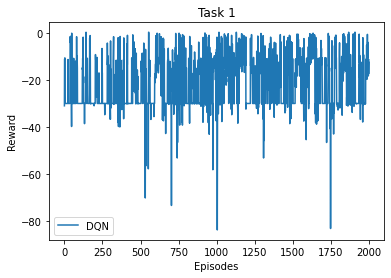

In [10]:
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.title("Task {}".format(i+1))
plt.plot(list(range(episodes)),rewards, label='DQN')
#plt.plot(list(range(episodes)),rewards2, label='A2C')
plt.legend()
plt.savefig("Task 1 A4")

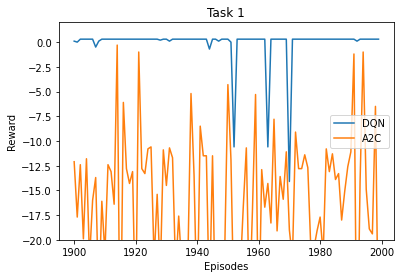

In [9]:
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.title("Task {}".format(i+1))
plt.plot(list(range(episodes)[1900:]),rewards[1900:], label='DQN')
plt.plot(list(range(episodes)[1900:]),rewards2[1900:], label='A2C')
plt.ylim(bottom=-20,top=2)
plt.legend()
plt.savefig("Task 1 A4 Last 100")

In [10]:
print(max(rewards))
#print(max(rewards2))

0.30000000000000004
0.10000000000000009


In [11]:
print(np.var(rewards[1900:]))
#print(np.var(rewards2[1900:]))

4.312490999999997
53.102419000000324
